# Часть 2. Моделирование.

## DBSCAN

Подберём гиперпараметр при помощи Silhouette plot.

In [1]:
import pandas as pd

df = pd.read_csv(r'.\german_credit_data_Preprocessed.csv')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

X = df

def dbscan_clustering(eps, X, plot = False):
    dbscan = DBSCAN(eps=eps).fit(X)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    print(f'eps={eps:.1f}; кластеров: {n_clusters}')

    if plot:
        labels = agg.labels_
        plt.scatter(X[:,0], X[:,1], c=labels)
        plt.title(str(n_clusters)+' кластера')
        plt.show();
        
    return dbscan

## Cилуэтный коэффициент
Подберем гиперпараметр eps и выберем число кластеров с помощью метрики Силуэтный коэффициент.

 16%|█████████▎                                                 | 3/19 [00:00<00:01,  9.12it/s]

eps=0.1; кластеров: 13
eps=0.2; кластеров: 24
eps=0.3; кластеров: 33


 26%|███████████████▌                                           | 5/19 [00:00<00:01, 10.74it/s]

eps=0.4; кластеров: 21
eps=0.5; кластеров: 24
eps=0.6; кластеров: 17


 47%|███████████████████████████▉                               | 9/19 [00:00<00:00, 11.54it/s]

eps=0.7; кластеров: 13
eps=0.8; кластеров: 13
eps=0.9; кластеров: 14


 58%|█████████████████████████████████▌                        | 11/19 [00:01<00:00, 11.64it/s]

eps=1.0; кластеров: 14
eps=1.1; кластеров: 8
eps=1.2; кластеров: 8


 79%|█████████████████████████████████████████████▊            | 15/19 [00:01<00:00, 11.63it/s]

eps=1.3; кластеров: 8
eps=1.4; кластеров: 8
eps=1.5; кластеров: 1


 89%|███████████████████████████████████████████████████▉      | 17/19 [00:01<00:00, 11.71it/s]

eps=1.6; кластеров: 1
eps=1.7; кластеров: 1
eps=1.8; кластеров: 1


100%|██████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.19it/s]


eps=1.9; кластеров: 1


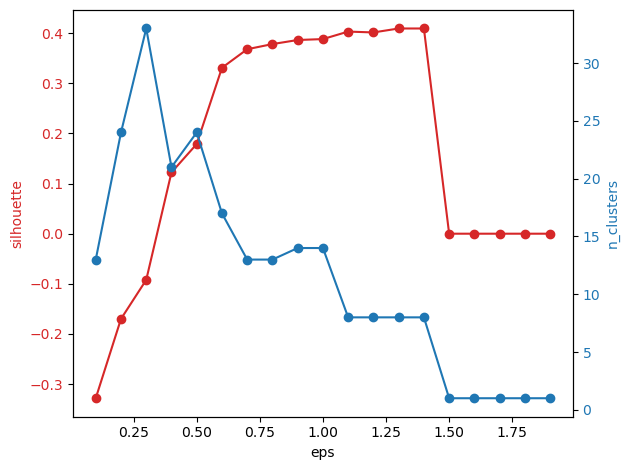

In [3]:
eps_range = np.arange(0.1,2,0.1)

def calc_silhouette_by_hyperparameter(fun_clustering, hyperparam_eps_range):
    silhouette = []
    clusters = []
    for i in tqdm(hyperparam_eps_range):
        dbscan = fun_clustering(i, X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
    return silhouette, clusters

def plot_silhouette_clusters_by_hyperparam(silhouette, clusters, eps_range, param_name):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

silhouette, clusters = calc_silhouette_by_hyperparameter(dbscan_clustering, eps_range) 
plot_silhouette_clusters_by_hyperparam(silhouette, clusters, eps_range, 'eps')

# Число кластеров

Мы видим по Силуэтной метрике, что оптимально выбрать 8 кластеров.

Построим визуализацию с использованием tSNE.

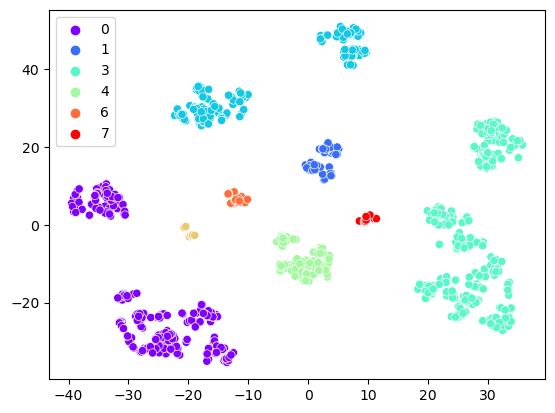

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=1.4).fit(X)
labels = dbscan.labels_

scatter_plot = sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

scatter_plot.get_figure().savefig("DBSCANplusTSNE_clusters.png")

## Результат

Картинка понятная, но TSNE выделил больше кластеров, чем DBSCAN.

In [5]:
df['label'] = labels
df.to_csv(r'.\\german_credit_data_Labeled_DBSCAN.csv', index=False)